In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
print("Total: " ,df['Exited'].count())
df['Exited'].value_counts()

Total:  10000


Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#One-Hat Encoding
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X=df.drop(columns=['Exited'])
Y=df['Exited'].values

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,train_size=0.2, random_state=0)

In [10]:
X_train.fillna(0, inplace=True)

In [11]:
scaler = StandardScaler()
X_train_trf= scaler.fit_transform(X_train)
X_test_trf= scaler.transform(X_test)

In [12]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3477,623,40,7,0.00,1,1,1,25904.12,False,True,False
9567,724,29,4,0.00,1,1,0,8982.75,False,False,True
8284,711,39,3,152462.79,1,1,0,90305.97,False,False,False
3129,631,37,9,131519.49,2,1,1,51752.18,True,False,True
8427,753,40,0,3768.69,2,1,0,177065.24,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [13]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (2000, 11)
X_test shape: (8000, 11)


In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [15]:
#Sequential model
model= Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
history= model.fit(X_train_trf,Y_train,epochs=15)

Epoch 1/15


63/63 [==============================] - 1s 2ms/step - loss: 0.8901 - accuracy: 0.2340
Epoch 2/15
63/63 [==============================] - 0s 2ms/step - loss: 0.8158 - accuracy: 0.2830
Epoch 3/15
63/63 [==============================] - 0s 1ms/step - loss: 0.7527 - accuracy: 0.3530
Epoch 4/15
63/63 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.4935
Epoch 5/15
63/63 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6485
Epoch 6/15
63/63 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.7465
Epoch 7/15
63/63 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7860
Epoch 8/15
63/63 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.7945
Epoch 9/15
63/63 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.7980
Epoch 10/15
63/63 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7995
Epoch 11/15
63/63

In [20]:
model.layers[0].get_weights()

[array([[ 3.6379691e-02,  4.6788724e-04, -3.0335778e-01],
        [ 9.7620207e-01, -4.6216217e-01, -1.1999825e-01],
        [-2.6088259e-01, -1.1548217e-01,  2.7871719e-01],
        [-2.2096913e-02, -3.3466512e-01,  4.0483817e-01],
        [-1.6805442e-01,  8.4224544e-02, -3.2730117e-01],
        [ 2.5958779e-01, -4.9905021e-02, -7.0483959e-01],
        [-3.7191230e-01,  3.0826706e-01,  3.4924898e-01],
        [-4.1111377e-01, -4.2243239e-01,  1.7169535e-01],
        [-1.9699264e-02, -3.4547508e-01, -4.7572082e-01],
        [-1.5342426e-01, -1.5943988e-01, -4.7602579e-01],
        [-3.8429049e-01,  1.3509801e-01, -2.5869358e-01]], dtype=float32),
 array([-0.49025106,  0.7346822 , -0.2188313 ], dtype=float32)]

In [ ]:
model.layers[1].get_weights()

[array([[-1.2959498],
        [ 0.2740924],
        [-1.0705441]], dtype=float32),
 array([-0.29477262], dtype=float32)]

In [ ]:
Y_log=model.predict(X_train_trf)
Y_log

63/63 [==============================] - 0s 1ms/step


array([[0.16479205],
       [0.10953531],
       [0.30961135],
       ...,
       [0.11728614],
       [0.08742424],
       [0.48155102]], dtype=float32)

In [ ]:
Y_pred= np.where(Y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_train)

0.7995

In [ ]:
history

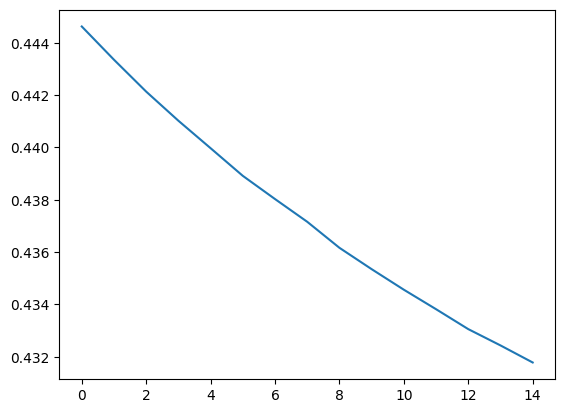

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
import pickle as pk
pk.dump(df,open('churn.pkl','wb'))